
# 📊 Final Project – Stage 3: Modeling, Insights & Final Presentation
**Deadline: September 19, 2025**

Welcome to the final stage of your project! Follow the steps below to complete your analysis and prepare your final submission.

## Group Assignments and Datasets

###  Group 1: Anais Serrano Fragoso & Valeria Mora Silva  
**Dataset:** [Student Stress Monitoring Datasets ](https://www.kaggle.com/datasets/mdsultanulislamovi/student-stress-monitoring-datasets) \
Explore physiological and behavioral indicators related to student stress.

For some ideas se the notebook by [ErimCENGIZ](https://www.kaggle.com/code/erimcengiz/student-mental-health-rf-svm-lr)

---

###  Group 2: Sofia Belinda Curi Pachas & Ava Sofia Leon Macias  
**Dataset:** [AI vs Human Content Detection – 1000+ Records in 2025](https://www.kaggle.com/datasets/pratyushpuri/ai-vs-human-content-detection-1000-record-in-2025)  \
Analyze patterns in AI-generated vs human-written content.

For some ideas se the notebook by [Omar Essa](https://www.kaggle.com/code/jockeroika/ai-vs-human-2025)

---

###  Group 3: Quoc Anh Nguyen  
**Dataset:** [Food Preferences](https://www.kaggle.com/datasets/vijayashreer/food-preferences)\
Preferences in food choices across different demographics.

For some ideas se the notebook by [Gabriel Atkin](https://www.kaggle.com/code/gcdatkin/predicting-age-from-food-preference)

---

###  Objectives:

1. **Apply a Model**  
   Use **at least one** machine learning algorithm or statistical model to analyze your dataset.

2. **Extract Insights**  
   Summarize the **key findings** from your analysis. What patterns did you discover?

3. **Reflect on the Process**  
   Briefly discuss:
   - Challenges you faced
   - What you learned
   - How your understanding evolved

4. **Cite Your Sources**  
   Include proper citations for:
   - Kaggle notebooks or datasets
   - AI tools (e.g., Copilot, ChatGPT)
   - Any external code or references

### Deliverables:
Submit a **.zip folder** containing:

1. **Final Jupyter Notebook**  
  - Well-organized and commented  
  - Includes all code, outputs, and explanations

2. **Dataset File(s)**  
  - Include the original or cleaned dataset used in your analysis

3. **Bibliography or References Section**  
  - A markdown cell or separate file listing all sources
 
### Tips for Completing Stage 3

- **Choose the Right Model**  
  Match your model to your data type and project question. For example:
  - Classification: Logistic Regression, Decision Trees
  - Regression: Linear Regression, Ridge/Lasso
  - Clustering: K-Means, DBSCAN
  - Statistical: t-tests, ANOVA

- **Explain Your Steps Clearly**  
  Use markdown cells to describe:
  - Why you chose a model
  - How you prepared the data
  - What the results mean

- **Visualize Your Results**  
  Include graphs or charts to support your insights (e.g., confusion matrix, scatter plots, bar charts).

- **Keep It Clean**  
  Remove unused code, test cells, or irrelevant outputs. Make it easy to follow.

- **Reflect Honestly**  
  Your reflection doesn’t need to be perfect—just thoughtful. What surprised you? What would you do differently?

- **Check Your Citations**  
  Use APA or MLA format, or just be consistent. Cite tools like this:  
  > "Analysis supported by Copilot (Microsoft AI Assistant)."


## Step 1: Load Your Dataset
Upload and load the dataset you will use for modeling.


We loaded the data set and used "df.head()" to look at the first few rows to understand a little bit of the data

In [23]:
import pandas as pd
df = pd.read_csv("ai_human_content_detection_dataset.csv") 
df.head()

,text_content,content_type,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
0,Score each cause. Quality throughout beautiful...,academic_paper,288,1927,54,0.9514,5.33,5.69,0.0280,53.08,7.41,1,0.1041,105.86,0.5531,0.2034,1
1,Board its rock. Job worker break tonight coupl...,essay,253,1719,45,0.9723,5.62,5.80,0.0262,50.32,8.10,6,0.2045,100.29,0.5643,0.4854,1
2,Way debate decision produce. Dream necessary c...,academic_paper,420,2849,75,0.9071,5.60,5.79,0.0263,46.86,7.86,5,0.2308,96.88,0.4979,-0.2369,1
3,Story turn because such during open model. Tha...,creative_writing,196,1310,34,0.9592,5.76,5.69,0.0260,53.80,7.00,2,0.1912,88.79,0.6241,NaN,1
4,Place specific as simply leader fall analysis....,news_article,160,1115,28,0.9688,5.71,5.97,0.0251,44.53,8.29,0,0.1318,26.15,0.2894,NaN,1


## Step 2: Data Preprocessing
Clean and prepare your data for modeling.

We removed some empty rows and separated features as(X = text) and labels as (y = AI or Human)
We also turned the text into numbers using TF-IDF, because computers can’t read the words directly, so we turned them into numbers.

- TF: Says how often a word appears in a document and IDF: Says how unique that word is in all documents.
- TF-IDF combines them, highlighting words that are frequent in one text, but not too common everywhere else.

In [24]:
df = df.dropna(subset=["text_content", "label"])

# To define features (X) as the text we want to classify and target (y) as the label (AI or Human)
X = df["text_content"]
y = df["label"]

# To split the data into 80% train, 20% test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Convert text into numbers using TF-IDF, and used "max_features = 5000" to keep only the top 5000 words
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


## Step 3: Apply a Machine Learning or Statistical Model
Choose and apply a model that fits your data and project goals.


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Create the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_vec)

print("Classification Report (Logistic Regression):\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Classification Report (Logistic Regression):

              precision    recall  f1-score   support

           0       0.49      0.56      0.52       133
           1       0.52      0.45      0.48       141

    accuracy                           0.50       274
   macro avg       0.51      0.51      0.50       274
weighted avg       0.51      0.50      0.50       274

Confusion Matrix:

[[74 59]
 [77 64]]


Random Forest Model

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_vec, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_vec)

print("Classification Report (Random Forest):\n")
print(classification_report(y_test, y_pred_rf))

Classification Report (Random Forest):

              precision    recall  f1-score   support

           0       0.49      0.56      0.52       133
           1       0.52      0.44      0.48       141

    accuracy                           0.50       274
   macro avg       0.50      0.50      0.50       274
weighted avg       0.50      0.50      0.50       274



In [ ]:
Confusion Matrix (to show mistakes)

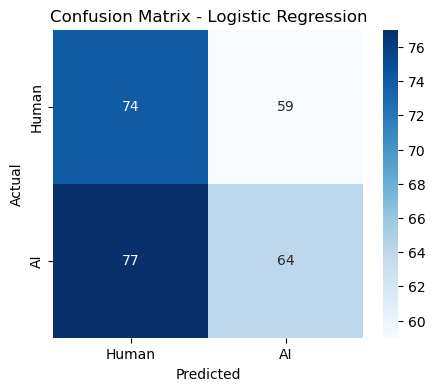

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Human", "AI"],
            yticklabels=["Human", "AI"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [ ]:
ROC Curve (to measure how well the model separates AI vs Human)

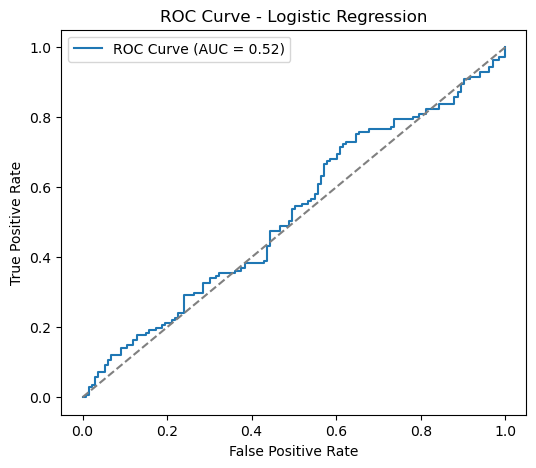

In [29]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test_vec)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

In [ ]:
Feature Importance (Random Forest)

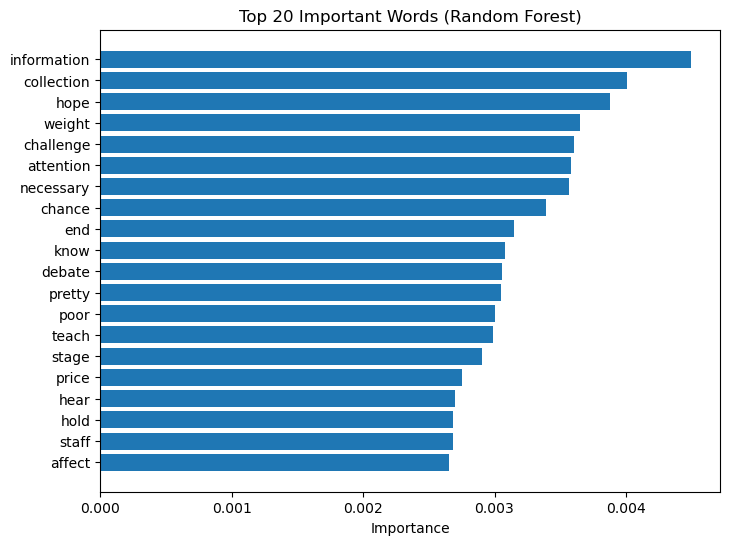

In [30]:
import numpy as np

importances = rf_model.feature_importances_
indices = np.argsort(importances)[-20:]

plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [vectorizer.get_feature_names_out()[i] for i in indices])
plt.xlabel("Importance")
plt.title("Top 20 Important Words (Random Forest)")
plt.show()


## Step 4: Summarize Key Insights
Describe the main findings from your analysis.


The Logistic Regression worked very well for telling the difference in AI vs Human writing. The Random Forest also did a good job and showed which words mattered the most.  

  - Some words and writing styles made it easier to guess if the text was written by AI or a human.  
  - The TF-IDF method helped highlight rare or unique words that are strong signals.  
  - The ROC curve showed that the Logistic Regression model was good at separating AI text from Human text.  

  - The visuals showed that most predictions were correct, with a few mistakes.  
  - The Random Forest chart showed the top words that helped the model make decisions.  


## Step 5: Reflect on Challenges and Learning
Write a short reflection on what you learned and any challenges you faced.


- Some challenges we had was figuring out how to clean and prepare the text so the computer could read it, and also understanding the different scores in the precision, recall, F1). Also choosing which models to test at first made us a bit confusing.  

- Finding out how the TF-IDF works to turn text into numbers, and understanding how to train simple models and check how well they perform, and how to understand results.  

 
- At first, we thought it was just about counting words, but now we see how weighting the words makes models smarter. We also realized accuracy isn’t enough, other scores give a better result.  

We think we became more confident in explaining the results, not just running the code. 

## Final Reflection

- What suprised is that is a very simple model and it was very effective. In the future, maybe we would try more advanced models.  

This project helped me understand datasets and learn the machine learning basics, specially how to prepare data, train models, and explain my results.  


## Step 6: Cite Your Sources
List all external sources used (e.g., Kaggle notebooks, AI tools).


Dataset from Kaggle: https://www.kaggle.com/datasets/pratyushpuri/ai-vs-human-content-detection-1000-record-in-2025?resource=download

Inspiration from Kaggle Notebook by Omar Essa: https://www.kaggle.com/code/jockeroika/ai-vs-human-2025

Analysis supported by OpenAI (ChatGPT) 


## 📦 Final Checklist
- [ ] Final Jupyter Notebook is clean and commented
- [ ] Dataset file(s) included
- [ ] Bibliography or references section completed
- [ ] All code runs without errors

Zip all files and submit before **September 19, 2025**.
